In [ ]:
# Import libraries
import numpy as np
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from IPython.display import display

# Colour scheme
legal_ease_palette = ['#2d6aa2', '#ffde59'] # Same as AT2 poster plots

# Set global theme for all plots
sns.set_theme(style="whitegrid")
sns.set_palette(legal_ease_palette)

# IMPORTANT: corpus.jsonl must be in same directory as this notebook for it to work
# Download from https://huggingface.co/datasets/isaacus/open-australian-legal-corpus/tree/main
file_path = 'corpus.jsonl'

c:\Users\mckee\miniconda3\envs\legalease\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Load file and skip duds
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError:
            continue # Ignore corrupted lines

df_full = pd.DataFrame(data)
print(f"{len(df_full):,} docs loaded")
display(df_full.head())

232,560 docs loaded


,version_id,type,jurisdiction,source,mime,date,citation,url,when_scraped,text
0,tasmanian_legislation:2008-10-08/sr-2008-119,secondary_legislation,tasmania,tasmanian_legislation,text/html,2008-10-08,Proclamation under the Commonwealth Powers (De...,https://www.legislation.tas.gov.au/view/whole/...,2024-09-13T22:44:32.436265+10:00,Proclamation under the Commonwealth Powers (De...
1,tasmanian_legislation:2004-10-06/sr-2004-080,secondary_legislation,tasmania,tasmanian_legislation,text/html,2004-10-06,Local Government Order 2004 (Tas),https://www.legislation.tas.gov.au/view/whole/...,2024-09-13T22:44:32.441289+10:00,Local Government Order 2004\n\nI make the foll...
2,tasmanian_legislation:2016-06-21/act-2009-050,primary_legislation,tasmania,tasmanian_legislation,text/html,2016-06-21,Police Miscellaneous Amendments Act (No. 2) 20...,https://www.legislation.tas.gov.au/view/whole/...,2024-09-13T22:44:32.444288+10:00,Police Miscellaneous Amendments Act (No. 2) 20...
3,tasmanian_legislation:2021-11-24/sr-2021-088,secondary_legislation,tasmania,tasmanian_legislation,text/html,2021-11-24,Threatened Species Protection Order 2021 (Tas),https://www.legislation.tas.gov.au/view/whole/...,2024-09-13T22:44:32.488306+10:00,Threatened Species Protection Order 2021\n\nI ...
4,tasmanian_legislation:2001-07-15/act-2001-041,primary_legislation,tasmania,tasmanian_legislation,text/html,2001-07-15,Corporations (Ancillary Provisions) Act 2001 (...,https://www.legislation.tas.gov.au/view/whole/...,2024-09-13T22:44:32.541903+10:00,Corporations (Ancillary Provisions) Act 2001\n...


In [6]:
# Show data fields in table
pd.set_option('display.max_colwidth', None) # Show full text

# Define table data
field_data = {
    'Data Field': [
        'version_id', 'type', 'jurisdiction', 'source', 'mime',
        'date', 'citation', 'url', 'when_scraped', 'text'
    ],
    'Description': [
        'Unique identifier for specific document version',
        'Document category e.g. Act, Regulation, Bill or Gazette',
        'State, territory or federal level of government the document belongs to',
        'Original parliamentary or government source from which the document was obtained',
        'Original file format',
        'Publication, enactment or effective date of the document',
        'Formal legal citation and document title',
        'Web address where the document was sourced',
        'Timestamp of when the data was collected',
        "Plain-text document body"
    ]
}

# Two-column df for readability
description_df = pd.DataFrame(field_data)

# Left-align text and headers
styled_df = description_df.style.set_properties(**{'text-align': 'left'})
styled_df.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

# Styled table
display(styled_df)

,Data Field,Description
0,version_id,Unique identifier for specific document version
1,type,"Document category e.g. Act, Regulation, Bill or Gazette"
2,jurisdiction,"State, territory or federal level of government the document belongs to"
3,source,Original parliamentary or government source from which the document was obtained
4,mime,Original file format
5,date,"Publication, enactment or effective date of the document"
6,citation,Formal legal citation and document title
7,url,Web address where the document was sourced
8,when_scraped,Timestamp of when the data was collected
9,text,Plain-text document body


In [7]:
# Check jurisdiction values
jurisdiction_counts = df_full['jurisdiction'].value_counts()
print(jurisdiction_counts)

jurisdiction
new_south_wales      119587
commonwealth         103882
queensland             3306
tasmania               2552
western_australia      1564
south_australia        1350
norfolk_island          319
Name: count, dtype: int64


In [8]:
# Find oldest and latest docs
df_full['date'] = pd.to_datetime(df_full['date'], errors='coerce')
df_dated = df_full.dropna(subset=['date'])

# Find the oldest and latest documents
oldest_doc = df_dated.loc[df_dated['date'].idxmin()]
latest_doc = df_dated.loc[df_dated['date'].idxmax()]

print(f"Oldest document in corpus:")
print(f"Date: {oldest_doc['date'].strftime('%d %B %Y')}")
print(f"Citation: {oldest_doc['citation']}")
print(f"Jurisdiction: {oldest_doc['jurisdiction'].upper()}")

print()

print(f"Latest document in corpus:")
print(f"Date: {latest_doc['date'].strftime('%d %B %Y')}")
print(f"Citation: {latest_doc['citation']}")
print(f"Jurisdiction: {latest_doc['jurisdiction'].upper()}")

Oldest document in corpus:
Date: 18 January 1830
Citation: Roman Catholic Relief Act 1830 (Qld)
Jurisdiction: QUEENSLAND

Latest document in corpus:
Date: 10 March 2025
Citation: Irvine v Temora Shire Council [2025] NSWCATAD 59
Jurisdiction: NEW_SOUTH_WALES


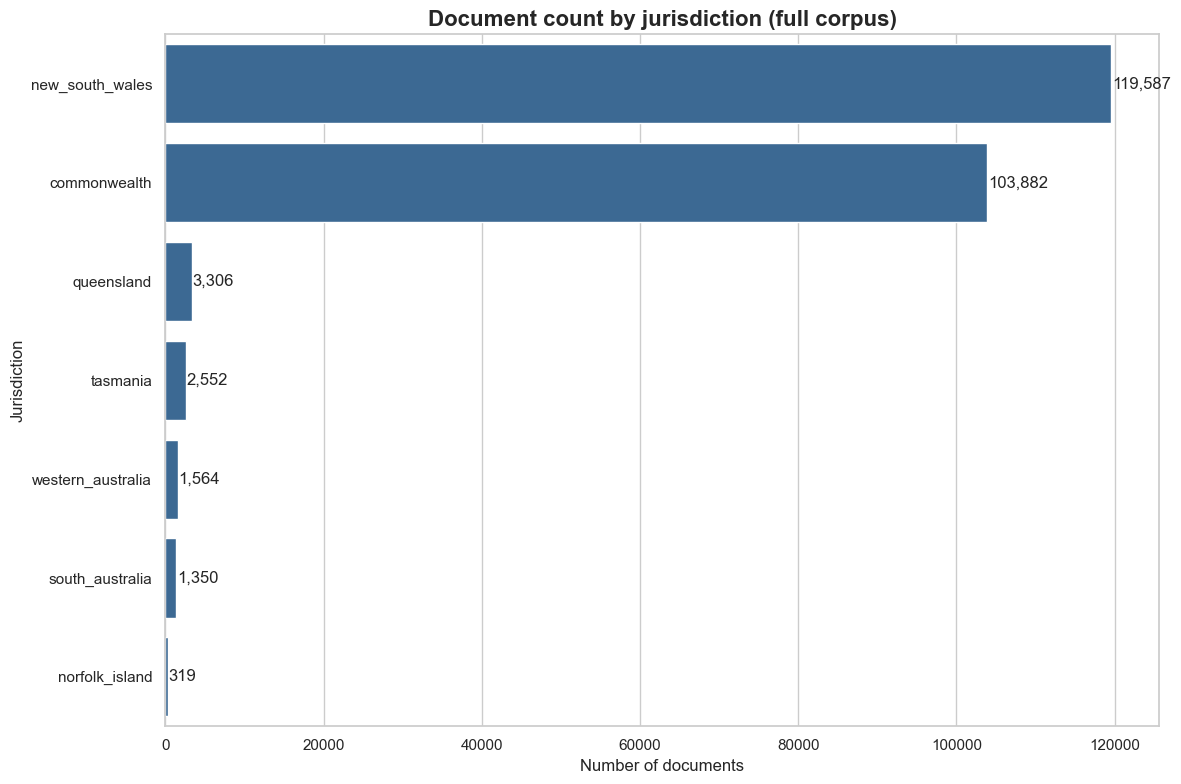

In [9]:
# Plot jurisdiction distribution
plt.figure(figsize=(12, 8))
jurisdiction_plot = sns.countplot(
    y=df_full['jurisdiction'],
    order=df_full['jurisdiction'].value_counts().index
)
plt.title('Document count by jurisdiction (full corpus)', fontsize=16, weight='bold')
plt.xlabel('Number of documents', fontsize=12)
plt.ylabel('Jurisdiction', fontsize=12)

# Bar labels
for p in jurisdiction_plot.patches:
    width = p.get_width()
    plt.text(width + 100, p.get_y() + p.get_height() / 2,
             f'{int(width):,}',
             va='center')

plt.tight_layout()
plt.show()

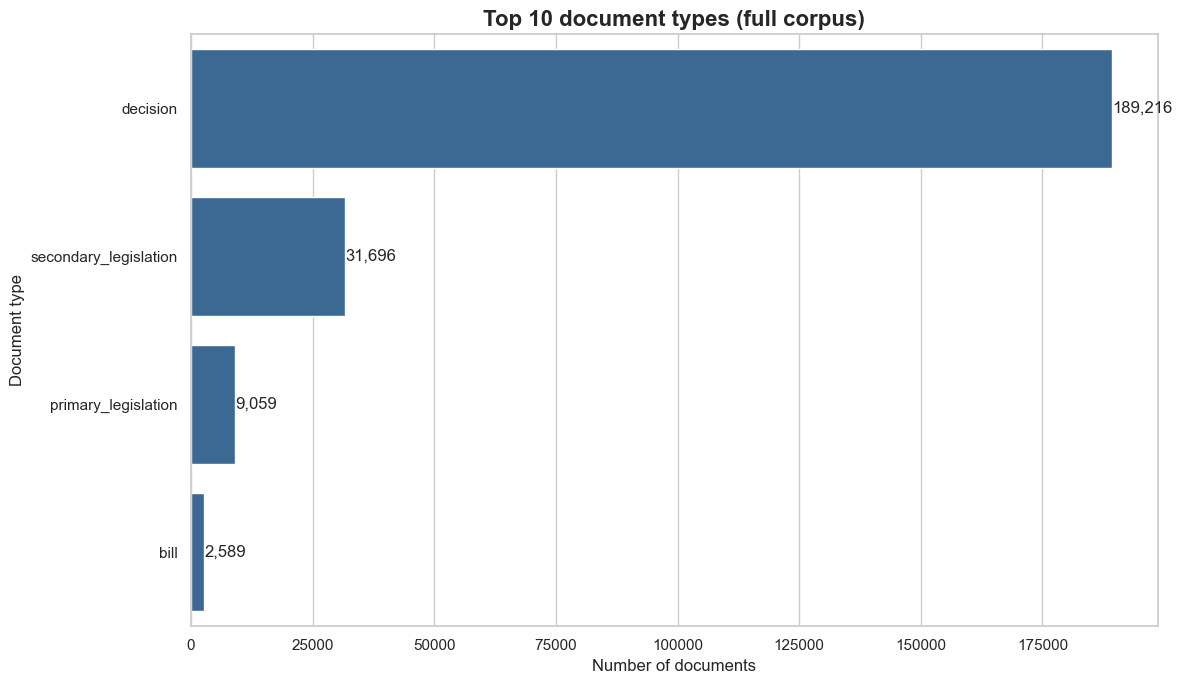

In [10]:
# Plot document type distribution
plt.figure(figsize=(12, 7))
type_plot = sns.countplot(
    y=df_full['type'],
    order=df_full['type'].value_counts().head(10).index, # Top 10 types
)
plt.title('Top 10 document types (full corpus)', fontsize=16, weight='bold')
plt.xlabel('Number of documents', fontsize=12)
plt.ylabel('Document type', fontsize=12)

# Bar labels
for p in type_plot.patches:
    width = p.get_width()
    plt.text(width + 100, p.get_y() + p.get_height() / 2,
             f'{int(width):,}',
             va='center')

plt.tight_layout()
plt.show()

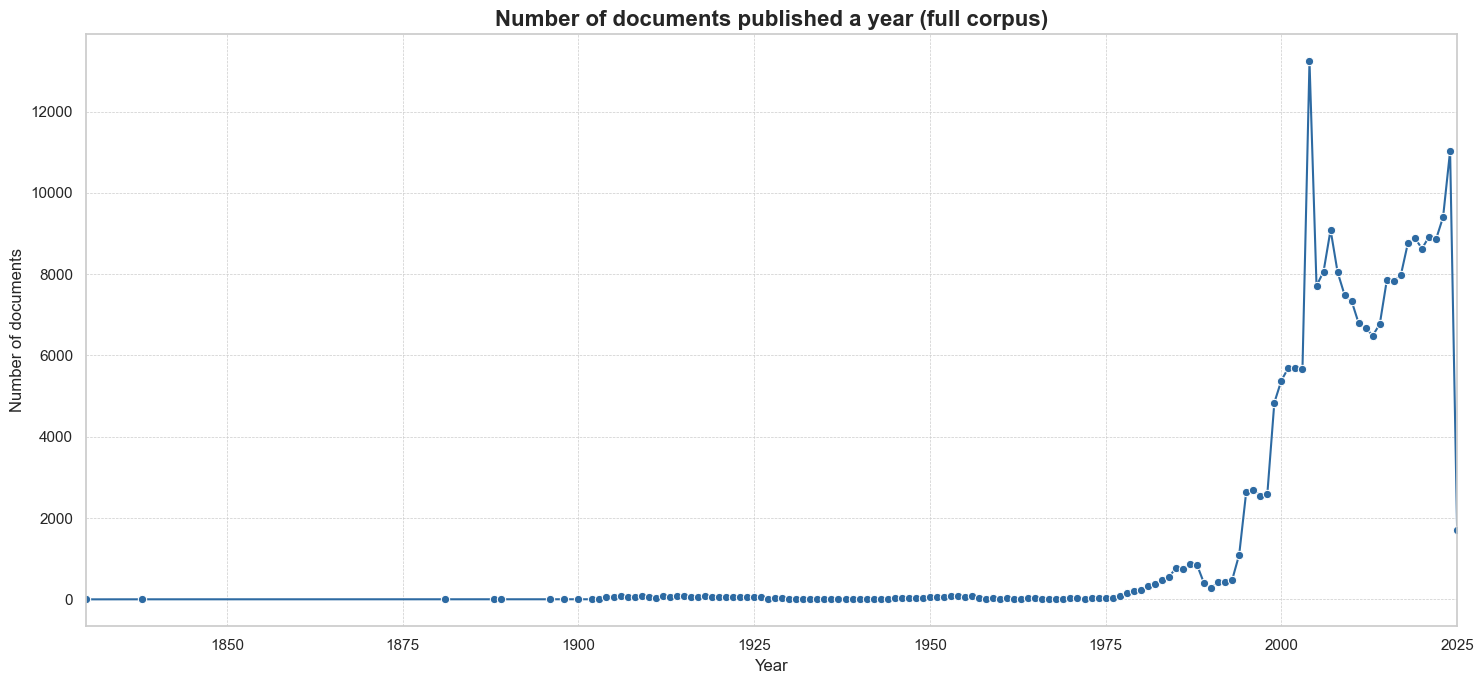

In [11]:
# Plot document distribution by year
df_full['date'] = pd.to_datetime(df_full['date'], errors='coerce') # Datetime conversion

# Prepare for Seaborn
yearly_counts = df_full.groupby(df_full['date'].dt.year)['version_id'].count().reset_index()
yearly_counts.columns = ['year', 'document_count']

plt.figure(figsize=(15, 7))
# Apply custom theme
sns.lineplot(x='year', y='document_count', data=yearly_counts, marker='o', linestyle='-')
plt.title('Number of documents published a year (full corpus)', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of documents', fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim(left=yearly_counts['year'].min(), right=yearly_counts['year'].max())
plt.tight_layout()
plt.show()

In [ ]:
# Filter for NSW legislation and caselaw
print(f"Original number of documents (all jurisdictions): {len(df_full):,}")

# Let's keep NSW
JURISDICTION_TO_KEEP = 'new_south_wales'

# Filter for NSW
df_nsw = df_full[df_full['jurisdiction'] == JURISDICTION_TO_KEEP].copy()

print(f"\nNumber of documents after filtering for '{JURISDICTION_TO_KEEP}': {len(df_nsw):,}")

# Verify
if len(df_nsw) > 0:
    print("First 5 rows:")
    print(df_nsw.head())
    print("NSW-only info:")
    df_nsw.info()
else: # No documents found
    print("0 documents after filtering. Is JURISDICTION_TO_KEEP correct?")

Original number of documents (all jurisdictions): 232,560

Number of documents after filtering for 'new_south_wales': 119,587
First 5 rows:
                                 version_id                 type  \
12  nsw_legislation:2009-07-06/act-1968-059  primary_legislation   
15  nsw_legislation:2021-07-01/act-2011-035  primary_legislation   
18     nsw_caselaw:54a63c143004de94513db49f             decision   
19     nsw_caselaw:5c1ca992e4b0b9ab40212a90             decision   
20     nsw_caselaw:549f71263004262463a71376             decision   

       jurisdiction           source       mime       date  \
12  new_south_wales  nsw_legislation  text/html 2009-07-06   
15  new_south_wales  nsw_legislation  text/html 2021-07-01   
18  new_south_wales      nsw_caselaw  text/html 2013-11-13   
19  new_south_wales      nsw_caselaw  text/html 2018-12-21   
20  new_south_wales      nsw_caselaw  text/html 2004-12-10   

                                             citation  \
12  Broken Hill to So

In [ ]:
# Save NSW df to Parquet and JSONL formats
output_parquet_path = 'nsw_corpus_final.parquet'
output_jsonl_path = 'nsw_corpus_final.jsonl'

# Save in Parquet format for minimum storage space and maximum loading speed
try:
    print(f"\nSaving {len(df_nsw):,} documents to Parquet: '{output_parquet_path}'...")
    df_nsw.to_parquet(output_parquet_path)
    print("Parquet save complete")
except Exception as e:
    print(f"ERROR saving to Parquet: {e}")

# Save in JSONL format for simple checks
try:
    print(f"\nSaving {len(df_nsw):,} documents to JSONL: '{output_jsonl_path}'...")
    df_nsw.to_json(output_jsonl_path, orient='records', lines=True)
    print("JSONL save complete")
except Exception as e:
    print(f"ERROR saving to JSONL: {e}")

print("\nSaves sorted")


Saving 119,587 documents to Parquet: 'nsw_corpus_final.parquet'...
Parquet save complete

Saving 119,587 documents to JSONL: 'nsw_corpus_final.jsonl'...
JSONL save complete

Saves sorted
